# Chicago Crime Data Analysis
* Author: Kevin Chuang ([@k-chuang](https://github.com/k-chuang))
* Created on: March 18, 2018
* Description: Data exploration and data visualization on Chicago crime dataset from 2001 to present
* Curated dataset: [Chicago Crime dataset](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2)

In [1]:
## Import necessary packages
import pandas as pd
import numpy as np
import folium
from folium import plugins
from folium.plugins import MarkerCluster
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Set pandas's max row display
pd.set_option('display.max_row', 1000)

# Set pandas's max column width to 50
pd.set_option('display.max_columns', 50)

In [2]:
# Load in the Chicago crime dataset
df = pd.read_csv('Crimes_-_2001_to_present.csv')

### View subset of data

In [3]:
## Print first 5 lines of dataset
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10000092,HY189866,03/18/2015 07:44:00 PM,047XX W OHIO ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,1111,11.0,28.0,25.0,04B,1144606.0,1903566.0,2015,02/10/2018 03:50:01 PM,41.891399,-87.744385,"(41.891398861, -87.744384567)"
1,10000094,HY190059,03/18/2015 11:00:00 PM,066XX S MARSHFIELD AVE,4625,OTHER OFFENSE,PAROLE VIOLATION,STREET,True,False,725,7.0,15.0,67.0,26,1166468.0,1860715.0,2015,02/10/2018 03:50:01 PM,41.773372,-87.665319,"(41.773371528, -87.665319468)"
2,10000095,HY190052,03/18/2015 10:45:00 PM,044XX S LAKE PARK AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,222,2.0,4.0,39.0,08B,1185075.0,1875622.0,2015,02/10/2018 03:50:01 PM,41.813861,-87.596643,"(41.81386068, -87.596642837)"
3,10000096,HY190054,03/18/2015 10:30:00 PM,051XX S MICHIGAN AVE,0460,BATTERY,SIMPLE,APARTMENT,False,False,225,2.0,3.0,40.0,08B,1178033.0,1870804.0,2015,02/10/2018 03:50:01 PM,41.800802,-87.622619,"(41.800802415, -87.622619343)"
4,10000097,HY189976,03/18/2015 09:00:00 PM,047XX W ADAMS ST,031A,ROBBERY,ARMED: HANDGUN,SIDEWALK,False,False,1113,11.0,28.0,25.0,03,1144920.0,1898709.0,2015,02/10/2018 03:50:01 PM,41.878065,-87.743354,"(41.878064761, -87.743354013)"


In [4]:
## Print last 5 lines of dataset
df.tail()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
6556323,23805,JB139300,02/02/2018 09:51:00 PM,086XX S CARPENTER ST,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,True,True,613,6.0,21.0,71.0,01A,1170825.0,1847590.0,2018,02/09/2018 04:07:13 PM,41.737261,-87.64973,"(41.737260844, -87.649730029)"
6556324,9769236,HX356686,07/23/2014 06:00:00 AM,006XX W OHARE ST,2031,NARCOTICS,POSS: METHAMPHETAMINES,GOVERNMENT BUILDING/PROPERTY,True,False,1654,16.0,41.0,76.0,18,NaN,NaN,2014,02/10/2018 03:50:01 PM,NaN,NaN,NaN
6556325,9769239,HX355381,07/22/2014 06:00:00 AM,033XX W FILLMORE ST,1812,NARCOTICS,POSS: CANNABIS MORE THAN 30GMS,POLICE FACILITY/VEH PARKING LOT,True,False,1134,11.0,24.0,29.0,18,NaN,NaN,2014,02/10/2018 03:50:01 PM,NaN,NaN,NaN
6556326,9769284,HX354657,07/21/2014 05:08:12 PM,049XX W IOWA ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,APARTMENT,True,False,1531,15.0,37.0,25.0,18,NaN,NaN,2014,02/10/2018 03:50:01 PM,NaN,NaN,NaN
6556327,9780607,HX340487,07/11/2014 06:00:00 AM,033XX W FILLMORE ST,2022,NARCOTICS,POSS: COCAINE,POLICE FACILITY/VEH PARKING LOT,True,False,1134,11.0,24.0,29.0,18,NaN,NaN,2014,02/10/2018 03:50:01 PM,NaN,NaN,NaN


In [5]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

## What crimes are most prevalent in Chicago?

In [6]:
## Check if any rows are missing data and are null
df['Primary Type'].isnull().values.any()

False

In [7]:
## Count number of observations for each crime
df['Primary Type'].value_counts()

THEFT                                1371621
BATTERY                              1196396
CRIMINAL DAMAGE                       751361
NARCOTICS                             701656
OTHER OFFENSE                         406482
ASSAULT                               403841
BURGLARY                              379642
MOTOR VEHICLE THEFT                   307531
ROBBERY                               248993
DECEPTIVE PRACTICE                    248335
CRIMINAL TRESPASS                     188626
PROSTITUTION                           67754
WEAPONS VIOLATION                      66749
PUBLIC PEACE VIOLATION                 46810
OFFENSE INVOLVING CHILDREN             43603
CRIM SEXUAL ASSAULT                    25808
SEX OFFENSE                            24159
GAMBLING                               14233
INTERFERENCE WITH PUBLIC OFFICER       14204
LIQUOR LAW VIOLATION                   13855
ARSON                                  10885
HOMICIDE                                8997
KIDNAPPING

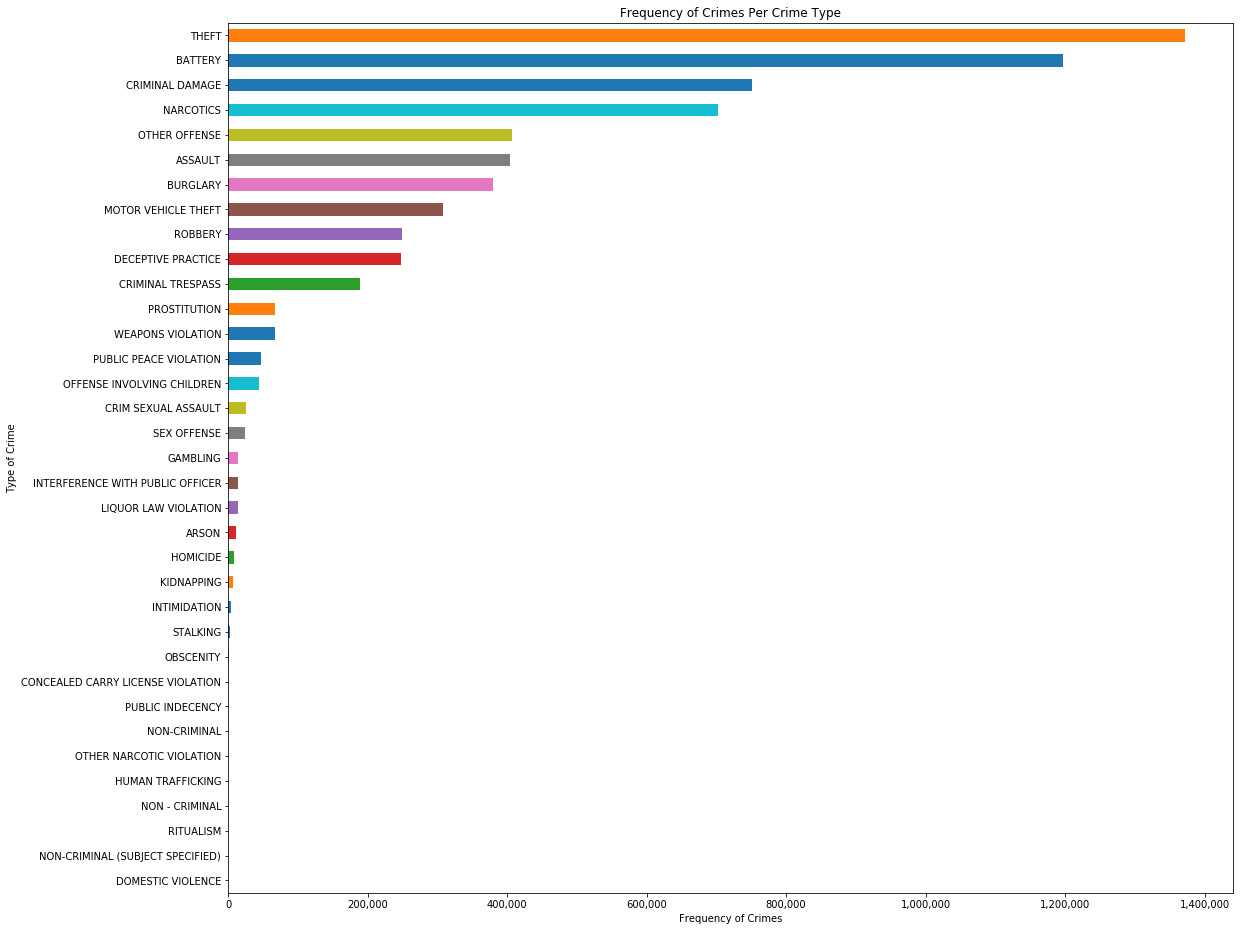

In [8]:
## Plot these for better visualization
crime_type_df = df['Primary Type'].value_counts(ascending=True)

## Some formatting to make it look nicer
fig=plt.figure(figsize=(18, 16))
plt.title("Frequency of Crimes Per Crime Type")
plt.xlabel("Frequency of Crimes")
plt.ylabel("Type of Crime")
ax = crime_type_df.plot(kind='barh')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))


## What year had the most crime?

In [9]:
## Check if any rows are missing data and are null
df['Year'].isnull().values.any()

False

In [10]:
## Count number of reported crimes for each year
df['Year'].value_counts()

2002    486748
2001    485739
2003    475926
2004    469369
2005    453692
2006    448077
2007    436974
2008    427009
2009    392623
2010    370253
2011    351687
2012    335842
2013    306892
2014    274933
2016    268409
2017    266578
2015    263628
2018     41949
Name: Year, dtype: int64

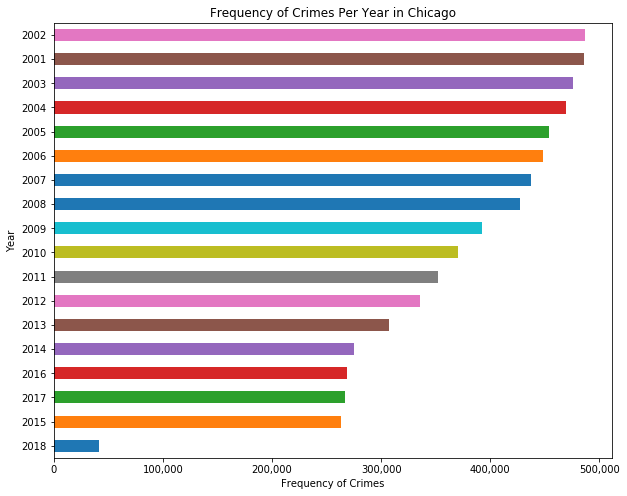

In [11]:
## Plot these for better visualization
crime_year_df = df['Year'].value_counts(ascending=True)

## Some formatting to make it look nicer
fig=plt.figure(figsize=(10, 8))
plt.title("Frequency of Crimes Per Year in Chicago")
plt.xlabel("Frequency of Crimes")
plt.ylabel("Year")
ax = crime_year_df.plot(kind='barh')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

## What percentage of arrests were successful?

In [12]:
## Check if any rows are missing data and are null
df['Arrest'].isnull().values.any()

False

In [13]:
## Count number of successful arrests for each year
df['Arrest'].value_counts()

False    4722561
True     1833767
Name: Arrest, dtype: int64

In [14]:
## Convert values into percentages
arrest_df = df['Arrest'].value_counts()
arrest_percent = (arrest_df / df['Arrest'].sum()) * 100 

## Rename Series.name
arrest_percent.rename("% of Arrests",inplace=True)

## Rename True and False to % Arrested and % Not Arrested
arrest_percent.rename({True: '% Arrested', False: '% Not Arrested'},inplace=True)

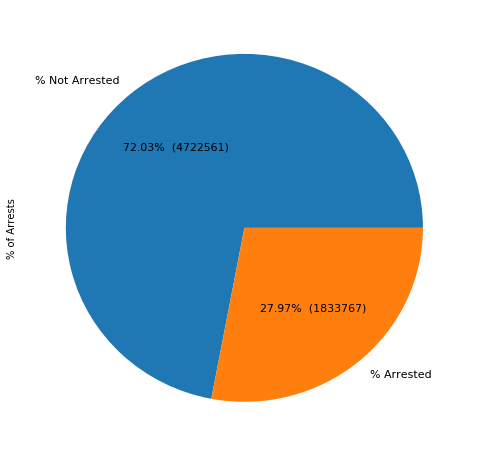

In [15]:
## Format pie chart to nicely show percentage and count
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

## Plot results in a pie chart
arrest_percent.plot.pie(fontsize=11,
                       autopct=make_autopct(df['Arrest'].value_counts()),
                       figsize=(8, 8))


## What are the successful arrest percentages per year?

In [16]:
## Group dataset by year and arrests
arrest_per_year = df.groupby('Year')['Arrest'].value_counts().rename('Counts').to_frame()
arrest_per_year['Percentage'] = (100 * arrest_per_year / arrest_per_year.groupby(level=0).sum())
arrest_per_year.reset_index(level=[1],inplace=True)
arrest_per_year

,Arrest,Counts,Percentage
Year,,,
2001,False,343839,70.786781
2001,True,141900,29.213219
2002,False,345205,70.920682
2002,True,141543,29.079318
2003,False,334357,70.253989
2003,True,141569,29.746011
2004,False,324688,69.175425
2004,True,144681,30.824575
2005,False,312799,68.945232


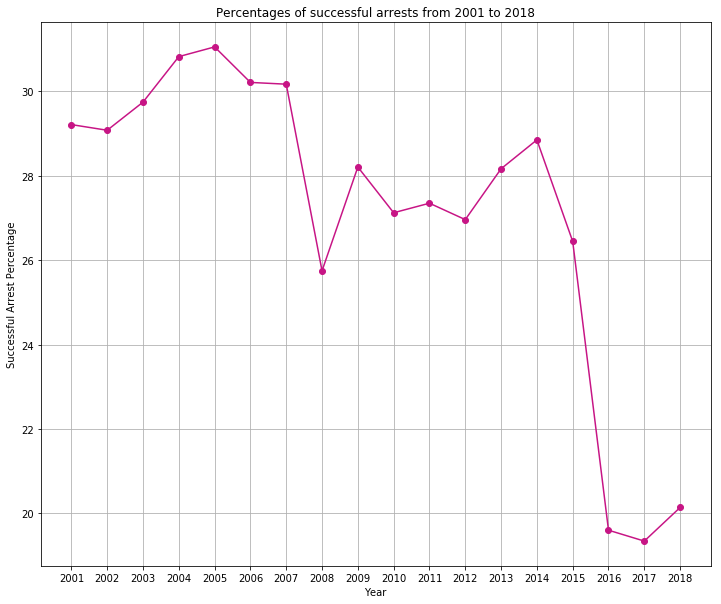

In [17]:
## Create a line plot for percentages of successful arrests over time (2001 to present)
line_plot = arrest_per_year[arrest_per_year['Arrest'] == True]['Percentage']

## Configure line plot to make visualizing data cleaner
labels = line_plot.index.values
fig=plt.figure(figsize=(12, 10))
plt.title('Percentages of successful arrests from 2001 to 2018')
plt.xlabel("Year")
plt.ylabel("Successful Arrest Percentage")
plt.xticks(line_plot.index, line_plot.index.values)

line_plot.plot(grid=True, marker='o', color='mediumvioletred')


## Data visualization for crimes commited since this month started

In [18]:
import datetime

## Clean data, create copy, and filter based on this month (March 2018)
cleaned_df = df[df['Latitude'].notnull() & df['Longitude'].notnull()].copy()
cleaned_df['Date Time'] = pd.to_datetime(cleaned_df['Date'], format='%m/%d/%Y %I:%M:%S %p')
cleaned_df = cleaned_df[cleaned_df['Date Time']  > datetime.datetime(2018, 2, 28)]
print("Number of crimes in Chicago since start of March 2018: %d" % len(cleaned_df))

Number of crimes in Chicago since start of March 2018: 6193


In [19]:
## Create map and markers for each crime in Chicago March 2018 using folium 
crimes_map = folium.Map(location=[cleaned_df['Latitude'].mean(), cleaned_df['Longitude'].mean()], zoom_start=10)
marker_cluster = MarkerCluster().add_to(crimes_map)

### Testing which loop was faster given large amounts of data (~6000 rows)

In [20]:
#%%timeit
#for i in range(0,len(cleaned_df)):
#    popup = popup = "<p> Crime ID: " + str(cleaned_df["ID"].iloc[i]) +  "<br> Date and Time: " + cleaned_df["Date"].iloc[i] + "<br> Crime Type: " + cleaned_df["Primary Type"].iloc[i] + "<br> Crime Description: " + cleaned_df["Description"].iloc[i] + "<br> Address: " + cleaned_df["Block"].iloc[i] + "</p>"
#    folium.Marker([cleaned_df['Latitude'].iloc[i],cleaned_df['Longitude'].iloc[i]], popup=popup).add_to(marker_cluster)

In [21]:
#%%timeit
#for row in cleaned_df.itertuples():
#    popup = "<p> Crime ID: " + str(row[1]) +  "<br> Date and Time: " + row[3] + "<br> Crime Type: " + row[6] + "<br> Crime Description: " + row[7] + "<br> Address: " + row[4] + "</p>"
#    folium.Marker([row[20], row[21]], popup=popup).add_to(marker_cluster)

In [22]:
#%%timeit
#cleaned_df.apply(lambda row:folium.Marker(location=[row["Latitude"], row["Longitude"]], popup="<p> Crime ID: " + str(row["ID"]) +  "<br> Date and Time: " + row["Date"] + "<br> Crime Type: " + row["Primary Type"] + "<br> Crime Description: " + row["Description"] + "<br> Address: " + row["Block"] + "</p>").add_to(marker_cluster), axis=1)


### Looping through underlying numpy array was slightly faster than ones above (much faster than .iterrows())

In [23]:
## Winner of the 4 chosen loop techniques (very close though)
## Show first 750 values so folium map can properly render inline in Google Chrome
for row in cleaned_df.values[:750]:
    popup = "<p> Crime ID: " + str(row[0]) +  "<br> Date and Time: " + row[2] + "<br> Crime Type: " + row[5] + "<br> Crime Description: " + row[6] + "<br> Address: " + row[3] + "</p>"
    folium.Marker([row[19], row[20]], popup=popup).add_to(marker_cluster)
#crimes_map.save('March-2018-chicago-crimes.html')
crimes_map

In [24]:
## Create heat map of crimes in Chicago March 2018
crimes_heatmap = folium.Map(location=[cleaned_df['Latitude'].mean(), cleaned_df['Longitude'].mean()], zoom_start=10)
crimes_heatmap.add_child(plugins.HeatMap([[row[20], row[21]] for row in cleaned_df.itertuples()]))
crimes_heatmap.save("March-2018-chicago-crime-heatmap.html")
crimes_heatmap

## Data visualization for crimes based on district from 2001 to present

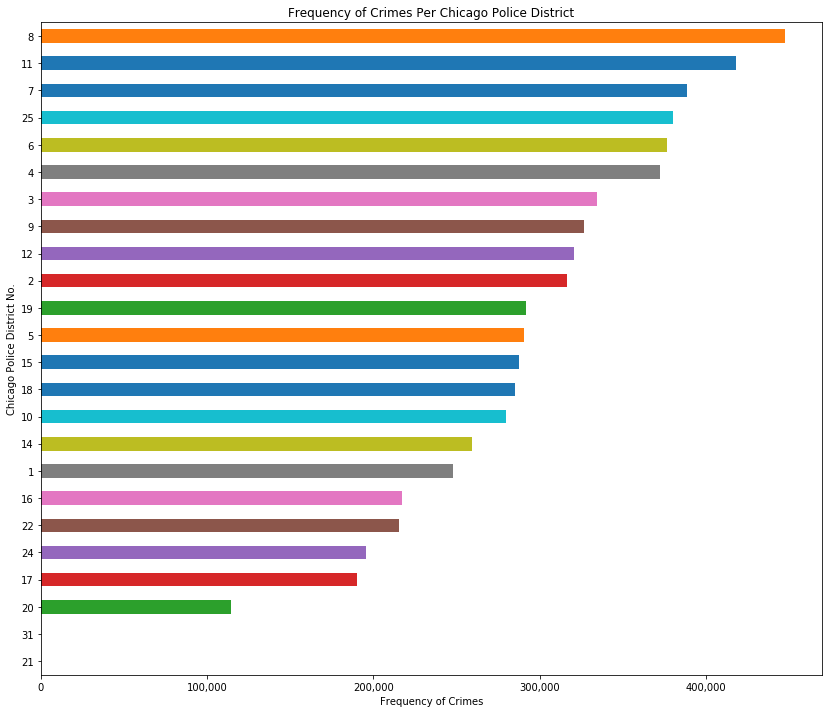

In [25]:
# calculating total number of incidents per district
district_crime = df['District'].value_counts(ascending=True)

## Data cleaning
district_crime.index = district_crime.index.astype(int)
district_crime.index = district_crime.index.astype(str)

## Plot bar graph for initial visualization
fig=plt.figure(figsize=(14, 12))
plt.title("Frequency of Crimes Per Chicago Police District")
plt.xlabel("Frequency of Crimes")
plt.ylabel("Chicago Police District No.")
ax = district_crime.plot(kind='barh')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))


In [26]:
## Reset index and name the district and crime count columns
district_crime = district_crime.reset_index()
district_crime.columns = ['District', 'Count']

In [27]:
# creation of the choropleth
geo_path = 'data/Boundaries - Police Districts (current).geojson'
district_map = folium.Map(location=[cleaned_df['Latitude'].mean(), cleaned_df['Longitude'].mean()], zoom_start=10)
threshold_scale = list(np.linspace(0,450000,6))
district_map.choropleth(geo_data=geo_path,
              name='choropleth',
              data = district_crime,
              threshold_scale=threshold_scale,
              columns = ['District', 'Count'],
              key_on = 'feature.properties.dist_num',
              fill_color = 'YlOrRd',
              fill_opacity = 0.7,
              line_opacity = 0.2,
              legend_name = 'Frequency of crimes per district',
              highlight=True)


district_map.save("Crime-per-district-choropleth.html")
district_map